In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MeanShift, Birch, AgglomerativeClustering

import descartes
import geopandas as gpd
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
prec_data = pd.read_csv("combined_precipitation_file.csv")
prec_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,111,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,347,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,162,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,105,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133


In [ ]:
world = gpd.read_file("cb_2018_us_county_500k.shp")

alabama = world[world['STATEFP']=='01']
arkansas = world[world['STATEFP']=='05']
florida = world[world['STATEFP']=='12']
georgia = world[world['STATEFP']=='13']
mississippi = world[world['STATEFP']=='28']
northcarolina = world[world['STATEFP']=='37']
tennessee = world[world['STATEFP']=='47']

**Combined State**

In [ ]:
# prec_data_scaled = (prec_data.iloc[:, 7:-1] - prec_data.iloc[:, 7:].min().min())/(prec_data.iloc[:, 7:].max().max() - prec_data.iloc[:, 7:].min().min())

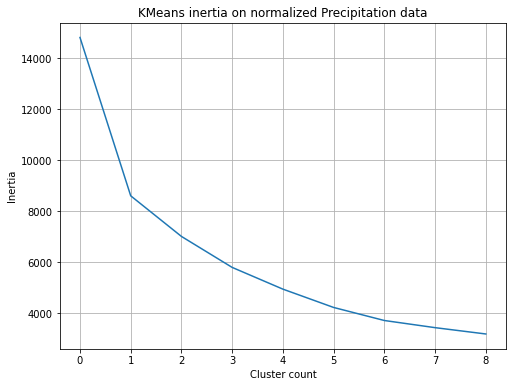

In [ ]:
inertia = []

for cluster_count in range(1, 10):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(prec_data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(inertia, label = 'Precipitation level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data")
plt.grid(True)

From the plot we can see that the elbow is at 6, that means we can take k as 6.

In [ ]:
map_data = pd.concat([prec_data.iloc[:, :7], prec_data_scaled, prec_data.iloc[:, -1:]], axis = 1)

kmeans = KMeans(6, init = 'k-means++', random_state = 42)
kmeans.fit(map_data.iloc[:, 7:-1])
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation,Cluster
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,0.106522,0.075000,0.148913,0.100000,0.283696,0.159783,0.192391,0.036957,0.354348,0.045652,0.121739,0.035870,0.021739,0.158696,0.107609,0.505435,0.341304,0.055435,0.043478,0.125000,0.166304,0.085870,0.288043,0.108696,0.075000,0.084783,0.215217,0.127174,0.070652,0.072826,0.047826,0.135870,0.144565,...,0.051087,0.080435,0.076087,0.314130,0.185870,0.109783,0.190217,0.101087,0.173913,0.202174,0.118478,0.129348,0.098913,0.184783,0.170652,0.138043,0.129348,0.205435,0.331522,0.307609,0.128261,0.255435,0.177174,0.336957,0.196739,0.048913,0.305435,0.116304,0.293478,0.253261,0.331522,0.106522,0.208696,0.159783,0.147826,0.286957,0.102174,0.127174,143,1
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,0.129348,0.121739,0.278261,0.150000,0.113043,0.209783,0.231522,0.363043,0.183696,0.014130,0.084783,0.029348,0.217391,0.056522,0.304348,0.065217,0.071739,0.168478,0.246739,0.300000,0.256522,0.178261,0.043478,0.016304,0.054348,0.056522,0.060870,0.086957,0.145652,0.646739,0.228261,0.384783,0.218478,...,0.061957,0.048913,0.151087,0.059783,0.065217,0.155435,0.351087,0.234783,0.360870,0.314130,0.201087,0.056522,0.069565,0.298913,0.159783,0.088043,0.068478,0.116304,0.141304,0.377174,0.403261,0.355435,0.106522,0.181522,0.097826,0.158696,0.038043,0.086957,0.018478,0.219565,0.123913,0.283696,0.290217,0.334783,0.261957,0.091304,0.184783,0.083696,133,0
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,0.054348,0.161957,0.235870,0.252174,0.132609,0.245652,0.231522,0.283696,0.343478,0.070652,0.051087,0.045652,0.085870,0.010870,0.080435,0.080435,0.114130,0.219565,0.216304,0.403261,0.264130,0.432609,0.028261,0.035870,0.019565,0.116304,0.077174,0.232609,0.346739,0.397826,0.247826,0.576087,0.318478,...,0.153261,0.030435,0.084783,0.017391,0.019565,0.184783,0.580435,0.332609,0.259783,0.220652,0.213043,0.079348,0.056522,0.053261,0.186957,0.117391,0.076087,0.075000,0.186957,0.377174,0.222826,0.407609,0.076087,0.216304,0.091304,0.247826,0.040217,0.118478,0.009783,0.122826,0.594565,0.298913,0.430435,0.271739,0.407609,0.468478,0.320652,0.042391,133,3
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,0.097826,0.135870,0.313043,0.143478,0.133696,0.242391,0.219565,0.310870,0.239130,0.014130,0.080435,0.029348,0.184783,0.031522,0.254348,0.050000,0.080435,0.263043,0.239130,0.308696,0.192391,0.357609,0.015217,0.033696,0.021739,0.060870,0.055435,0.068478,0.154348,0.502174,0.167391,0.343478,0.236957,...,0.033696,0.036957,0.101087,0.034783,0.035870,0.111957,0.343478,0.304348,0.369565,0.263043,0.158696,0.063043,0.068478,0.227174,0.144565,0.094565,0.050000,0.085870,0.151087,0.355435,0.363043,0.332609,0.109783,0.177174,0.073913,0.159783,0.025000,0.081522,0.007609,0.180435,0.245652,0.315217,0.308696,0.313043,0.265217,0.110870,0.172826,0.059783,133,0
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,0.184783,0.163043,0.143478,0.069565,0.146739,0.256522,0.196739,0.223913,0.134783,0.010870,0.064130,0.031522,0.203261,0.167391,0.116304,0.088043,0.088043,0.229348,0.218478,0.166304,0.193478,0.139130,0.081522,0.056522,0.030435,0.069565,0.134783,0.065217,0.253261,0.671739,0.135870,0.385870,0.197826,...,0.085

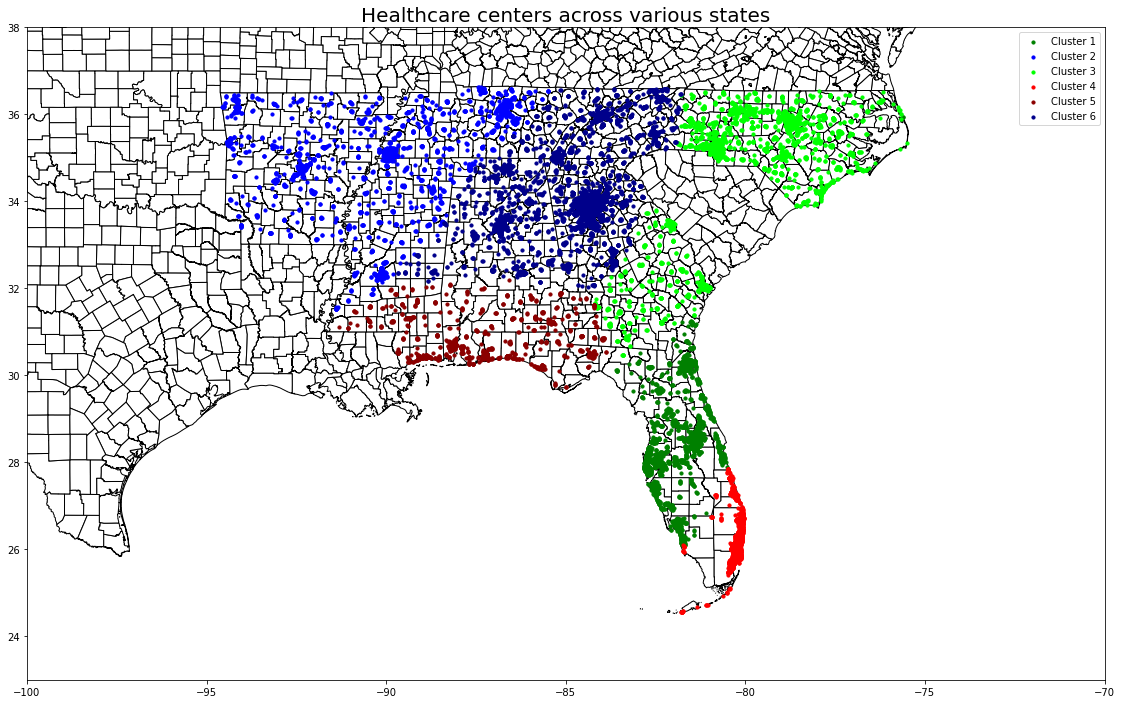

In [ ]:
ax = world.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (20, 12))

centers= map_data
points = [Point(xy) for xy in zip(centers["LONGITUDE"], centers["LATITUDE"])]
centers = gpd.GeoDataFrame(centers, crs = {'init': 'epsg:4326'}, geometry = points)

centers[centers["Cluster"] == 0].plot(color = 'green', ax = ax, markersize = 10, label = "Cluster 1")
centers[centers["Cluster"] == 1].plot(color = 'blue', ax = ax, markersize = 10, label = "Cluster 2")
centers[centers["Cluster"] == 2].plot(color = 'lime', ax = ax, markersize = 10, label = "Cluster 3")
centers[centers["Cluster"] == 3].plot(color = 'red', ax = ax, markersize = 10, label = "Cluster 4")
centers[centers["Cluster"] == 4].plot(color = 'darkred', ax = ax, markersize = 10, label = "Cluster 5")
centers[centers["Cluster"] == 5].plot(color = 'darkblue', ax = ax, markersize = 10, label = "Cluster 6")

plt.title("Healthcare centers across various states", fontsize = 20)
ax.set_xlim(-100, -70)
ax.set_ylim(23, 38)
# ax.axis('off')
plt.legend()


In [ ]:
centers[centers["Cluster"] == 0].iloc[:,7:-3]


,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,10_2012,11_2012,12_2012,01_2013,02_2013,03_2013,04_2013,...,09_2017,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020
1,0.129348,0.121739,0.278261,0.150000,0.113043,0.209783,0.231522,0.363043,0.183696,0.014130,0.084783,0.029348,0.217391,0.056522,0.304348,0.065217,0.071739,0.168478,0.246739,0.300000,0.256522,0.178261,0.043478,0.016304,0.054348,0.056522,0.060870,0.086957,0.145652,0.646739,0.228261,0.384783,0.218478,0.123913,0.027174,0.085870,0.031522,0.076087,0.072826,0.115217,...,0.358696,0.120652,0.061957,0.048913,0.151087,0.059783,0.065217,0.155435,0.351087,0.234783,0.360870,0.314130,0.201087,0.056522,0.069565,0.298913,0.159783,0.088043,0.068478,0.116304,0.141304,0.377174,0.403261,0.355435,0.106522,0.181522,0.097826,0.158696,0.038043,0.086957,0.018478,0.219565,0.123913,0.283696,0.290217,0.334783,0.261957,0.091304,0.184783,0.083696
3,0.097826,0.135870,0.313043,0.143478,0.133696,0.242391,0.219565,0.310870,0.239130,0.014130,0.080435,0.029348,0.184783,0.031522,0.254348,0.050000,0.080435,0.263043,0.239130,0.308696,0.192391,0.357609,0.015217,0.033696,0.021739,0.060870,0.055435,0.068478,0.154348,0.502174,0.167391,0.343478,0.236957,0.132609,0.009783,0.081522,0.020652,0.058696,0.044565,0.136957,...,0.390217,0.176087,0.033696,0.036957,0.101087,0.034783,0.035870,0.111957,0.343478,0.304348,0.369565,0.263043,0.158696,0.063043,0.068478,0.227174,0.144565,0.094565,0.050000,0.085870,0.151087,0.355435,0.363043,0.332609,0.109783,0.177174,0.073913,0.159783,0.025000,0.081522,0.007609,0.180435,0.245652,0.315217,0.308696,0.313043,0.265217,0.110870,0.172826,0.059783
4,0.184783,0.163043,0.143478,0.069565,0.146739,0.256522,0.196739,0.223913,0.134783,0.010870,0.064130,0.031522,0.203261,0.167391,0.116304,0.088043,0.088043,0.229348,0.218478,0.166304,0.193478,0.139130,0.081522,0.056522,0.030435,0.069565,0.134783,0.065217,0.253261,0.671739,0.135870,0.385870,0.197826,0.101087,0.015217,0.138043,0.035870,0.160870,0.114130,0.152174,...,0.409783,0.114130,0.085870,0.093478,0.151087,0.066304,0.093478,0.207609,0.261957,0.275000,0.294565,0.240217,0.107609,0.073913,0.145652,0.288043,0.183696,0.066304,0.082609,0.109783,0.090217,0.255435,0.275000,0.288043,0.078261,0.184783,0.107609,0.184783,0.036957,0.136957,0.075000,0.223913,0.129348,0.290217,0.260870,0.325000,0.238043,0.117391,0.092391,0.084783
5,0.179348,0.175000,0.250000,0.120652,0.138043,0.246739,0.226087,0.258696,0.143478,0.020652,0.064130,0.028261,0.189130,0.108696,0.203261,0.084783,0.077174,0.221739,0.208696,0.208696,0.175000,0.190217,0.058696,0.032609,0.047826,0.063043,0.105435,0.082609,0.205435,0.644565,0.172826,0.369565,0.218478,0.131522,0.018478,0.150000,0.028261,0.072826,0.067391,0.148913,...,0.372826,0.108696,0.108696,0.071739,0.164130,0.068478,0.091304,0.225000,0.325000,0.233696,0.322826,0.273913,0.135870,0.067391,0.096739,0.317391,0.180435,0.076087,0.070652,0.131522,0.100000,0.347826,0.350000,0.359783,0.085870,0.200000,0.092391,0.172826,0.034783,0.107609,0.032609,0.207609,0.142391,0.250000,0.309783,0.319565,0.257609,0.114130,0.121739,0.083696
44,0.189130,0.171739,0.153261,0.090217,0.158696,0.240217,0.211957,0.226087,0.122826,0.013043,0.057609,0.038043,0.197826,0.177174,0.133696,0.103261,0.085870,0.210870,0.227174,0.157609,0.185870,0.138043,0.085870,0.052174,0.039130,0.071739,0.144565,0.066304,0.265217,0.601087,0.145652,0.373913,0.207609,0.089130,0.015217,0.153261,0.033696,0.158696,0.098913,0.157609,...,0.392391,0.102174,0.095652,0.095652,0.153261,0.073913,0.106522,0.221739,0.271739,0.2

In [ ]:
print(centers[centers["Cluster"] == 0].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers["Cluster"] == 1].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers["Cluster"] == 2].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers["Cluster"] == 3].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers["Cluster"] == 4].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers["Cluster"] == 5].iloc[:,7:-3].mean(axis=1).mean())

0.17413045144293093
0.18264841024970097
0.1655190508410453
0.19273398402748457
0.19468655035577875
0.18699760191377163


In [ ]:
cl_0 = list(centers.index[centers['Cluster']==0])
cl_1 = list(centers.index[centers['Cluster']==1])
cl_2 = list(centers.index[centers['Cluster']==2])
cl_3 = list(centers.index[centers['Cluster']==3])
cl_4 = list(centers.index[centers['Cluster']==4])
cl_5 = list(centers.index[centers['Cluster']==5])

centers.loc[cl_0, 'Color']='green'
centers.loc[cl_1, 'Color']='blue'
centers.loc[cl_2, 'Color']='lime'
centers.loc[cl_3, 'Color']='red'
centers.loc[cl_4, 'Color']='darkred'
centers.loc[cl_5, 'Color']='darkblue'




In [ ]:
centers.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation,Cluster,geometry,Color
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143,1,POINT (-94.18298 36.30899),blue
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133,0,POINT (-82.20072 28.34796),green
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133,3,POINT (-80.12779 26.43719),red
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133,0,POINT (-81.47669 28.14478),green
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133,0,POINT (-81.83269 30.10876),green


In [ ]:
centers.to_csv("final.csv", index=False)

**ALABAMA**

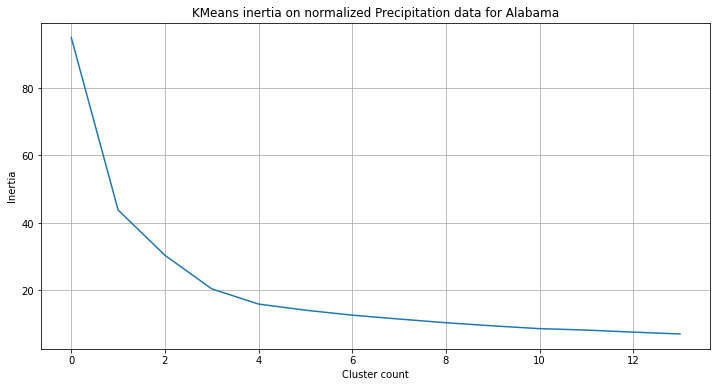

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "AL"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Alabama")
plt.grid(True)


No handles with labels found to put in legend.


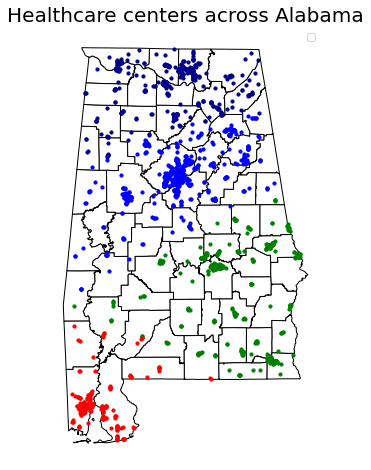

In [ ]:
map_data = prec_data[prec_data["STATE"] == "AL"].copy()

kmeans = KMeans(4, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = alabama.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_al = map_data
points = [Point(xy) for xy in zip(centers_al["LONGITUDE"], centers_al["LATITUDE"])]
centers_al = gpd.GeoDataFrame(centers_al, crs = {'init': 'epsg:4326'}, geometry = points)

centers_al[centers_al["Cluster"] == 0].plot(color = 'green', ax = ax, markersize = 10)
centers_al[centers_al["Cluster"] == 1].plot(color = 'blue', ax = ax, markersize = 10)
centers_al[centers_al["Cluster"] == 2].plot(color = 'red', ax = ax, markersize = 10)
centers_al[centers_al["Cluster"] == 3].plot(color = 'darkblue', ax = ax, markersize = 10)

plt.title("Healthcare centers across Alabama", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_al[centers_al["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_al[centers_al["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_al[centers_al["Cluster"] == 2].mean(axis=0))[4:].mean())
print((centers_al[centers_al["Cluster"] == 3].mean(axis=0))[4:].mean())


166.34114279037158
174.01289062500007
186.4597620946305
174.77212121212128


In [ ]:
cl_0 = list(centers_al.index[centers_al['Cluster']==0])
cl_1 = list(centers_al.index[centers_al['Cluster']==1])
cl_2 = list(centers_al.index[centers_al['Cluster']==2])
cl_3 = list(centers_al.index[centers_al['Cluster']==3])

centers_al.loc[cl_0, 'Color']='green'
centers_al.loc[cl_1, 'Color']='blue'
centers_al.loc[cl_2, 'Color']='red'
centers_al.loc[cl_3, 'Color']='darkblue'

centers_al = centers_al[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_al.to_csv("Alabama.csv")


**ARKANSAS**

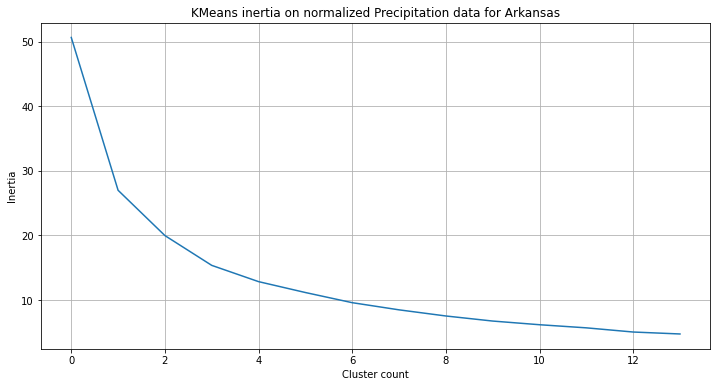

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "AR"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Arkansas")
plt.grid(True)

No handles with labels found to put in legend.


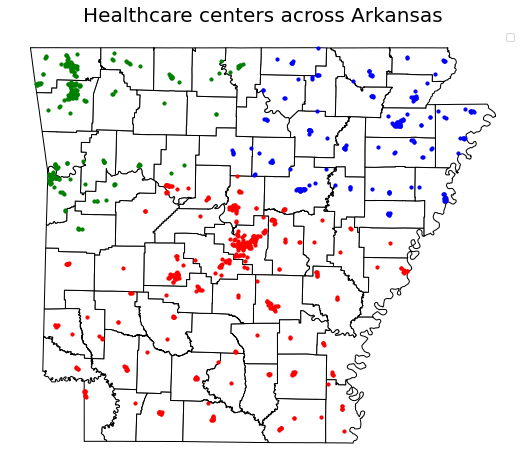

In [ ]:
map_data = prec_data[prec_data["STATE"] == "AR"].copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = arkansas.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ar = map_data
points = [Point(xy) for xy in zip(centers_ar["LONGITUDE"], centers_ar["LATITUDE"])]
centers_ar = gpd.GeoDataFrame(centers_ar, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ar[centers_ar["Cluster"] == 0].plot(color = 'green', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 1].plot(color = 'blue', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 2].plot(color = 'red', ax = ax, markersize = 10)


plt.title("Healthcare centers across Arkansas", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_ar[centers_ar["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_ar[centers_ar["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_ar[centers_ar["Cluster"] == 2].mean(axis=0))[4:].mean())


152.8371672187462
159.0692009783938
164.3792123824451


In [ ]:
cl_0 = list(centers_ar.index[centers_ar['Cluster']==0])
cl_1 = list(centers_ar.index[centers_ar['Cluster']==1])
cl_2 = list(centers_ar.index[centers_ar['Cluster']==2])


centers_ar.loc[cl_0, 'Color']='green'
centers_ar.loc[cl_1, 'Color']='blue'
centers_ar.loc[cl_2, 'Color']='red'

centers_ar = centers_ar[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_ar.to_csv("Arkansas.csv")
centers_ar

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,Cluster,Color
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,0,green
7,372903,MERCY HOSPITAL FORT SMITH,7301 ROGERS AVENUE,AR,35.355866,-94.352055,HOSPITAL,0,green
8,7472901,HEALTHSOUTH REHABILITATION HOSPITAL OF FORT SMITH,1401 SOUTH J STREET,AR,35.373940,-94.418754,HOSPITAL,0,green
9,9700000,WHITE COUNTY MEDICAL CENTER - SOUTH CAMPUS,1200 SOUTH MAIN STREET,AR,35.234094,-91.731074,HOSPITAL,1,blue
10,10172143,WHITE COUNTY MEDICAL CENTER - NORTH CAMPUS,3214 EAST RACE AVENUE,AR,35.251886,-91.697001,HOSPITAL,1,blue
...,...,...,...,...,...,...,...,...,...
2200,10896,CYF Pharmacy,1521 Merrill Dr Ste D220,AR,34.768759,-92.399467,PHARMACY,2,red
2201,10897,Live+Well Pharmacy,767 W North St,AR,36.077137,-94.170548,PHARMACY,0,green
2202,10898,SMITH DRUG AND COMPOUNDING INC.,1 Mercy Ln Ste 103,AR,34.467638,-93.068013,PHARMACY,2,red
2203,10899,Roland Drug Store #2,600 Highway 365,AR,34.962865,-92.423514,PHARMACY,2,red


**FLORIDA**

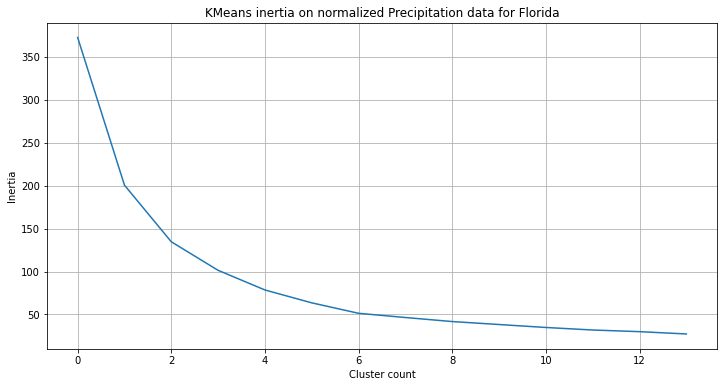

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "FL"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Florida")
plt.grid(True)



No handles with labels found to put in legend.


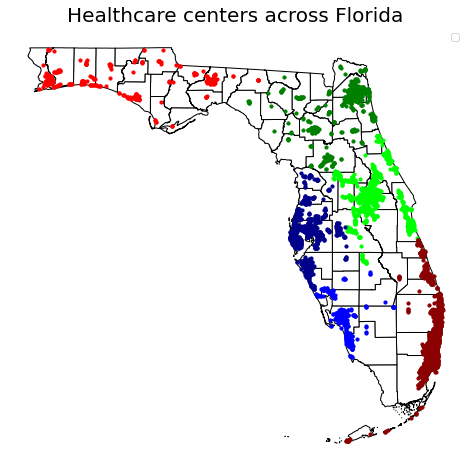

In [ ]:
map_data = prec_data[prec_data["STATE"] == "FL"].copy()

kmeans = KMeans(6, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = florida.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_fl = map_data
points = [Point(xy) for xy in zip(centers_fl["LONGITUDE"], centers_fl["LATITUDE"])]
centers_fl = gpd.GeoDataFrame(centers_fl, crs = {'init': 'epsg:4326'}, geometry = points)

centers_fl[centers_fl["Cluster"] == 0].plot(color = 'lime', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 1].plot(color = 'darkred', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 2].plot(color = 'red', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 3].plot(color = 'darkblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 4].plot(color = 'green', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 5].plot(color = 'blue', ax = ax, markersize = 10)


plt.title("Healthcare centers across Florida", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_fl[centers_fl["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_fl[centers_fl["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_fl[centers_fl["Cluster"] == 2].mean(axis=0))[4:].mean())
print((centers_fl[centers_fl["Cluster"] == 3].mean(axis=0))[4:].mean())
print((centers_fl[centers_fl["Cluster"] == 4].mean(axis=0))[4:].mean())
print((centers_fl[centers_fl["Cluster"] == 5].mean(axis=0))[4:].mean())

154.5467771639042
178.06127496733254
175.60195212311194
167.67879120513584
156.31440109984533
162.7633157513703


In [ ]:
cl_0 = list(centers_fl.index[centers_fl['Cluster']==0])
cl_1 = list(centers_fl.index[centers_fl['Cluster']==1])
cl_2 = list(centers_fl.index[centers_fl['Cluster']==2])
cl_3 = list(centers_fl.index[centers_fl['Cluster']==3])
cl_4 = list(centers_fl.index[centers_fl['Cluster']==4])
cl_5 = list(centers_fl.index[centers_fl['Cluster']==5])

centers_fl.loc[cl_0, 'Color']='lime'
centers_fl.loc[cl_1, 'Color']='darkred'
centers_fl.loc[cl_2, 'Color']='red'
centers_fl.loc[cl_3, 'Color']='darkblue'
centers_fl.loc[cl_4, 'Color']='green'
centers_fl.loc[cl_5, 'Color']='blue'

centers_fl = centers_fl[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_fl.to_csv("Florida.csv", index=False)

**GEORGIA**

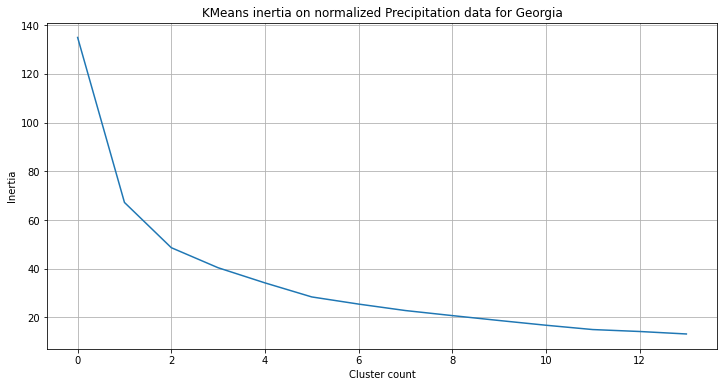

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "GA"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Georgia")
plt.grid(True)

No handles with labels found to put in legend.


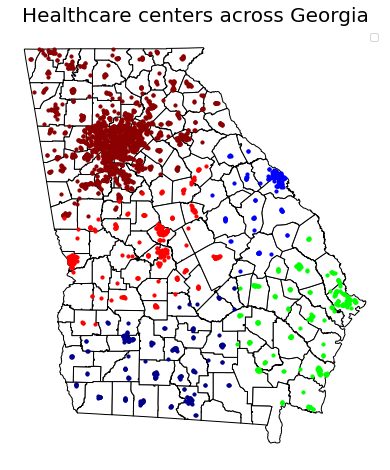

In [ ]:
map_data = prec_data[prec_data["STATE"] == "GA"].copy()

kmeans = KMeans(5, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = georgia.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ga = map_data
points = [Point(xy) for xy in zip(centers_ga["LONGITUDE"], centers_ga["LATITUDE"])]
centers_ga = gpd.GeoDataFrame(centers_ga, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ga[centers_ga["Cluster"] == 0].plot(color = 'darkblue', ax = ax, markersize = 10)
centers_ga[centers_ga["Cluster"] == 1].plot(color = 'darkred', ax = ax, markersize = 10)
centers_ga[centers_ga["Cluster"] == 2].plot(color = 'blue', ax = ax, markersize = 10)
centers_ga[centers_ga["Cluster"] == 3].plot(color = 'lime', ax = ax, markersize = 10)
centers_ga[centers_ga["Cluster"] == 4].plot(color = 'red', ax = ax, markersize = 10)

plt.title("Healthcare centers across Georgia", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_ga[centers_ga["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_ga[centers_ga["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_ga[centers_ga["Cluster"] == 2].mean(axis=0))[4:].mean())
print((centers_ga[centers_ga["Cluster"] == 3].mean(axis=0))[4:].mean())
print((centers_ga[centers_ga["Cluster"] == 4].mean(axis=0))[4:].mean())

148.76505760080138
169.13715148197903
147.41272727272735
142.31799509176267
153.61959935489347


In [ ]:
cl_0 = list(centers_ga.index[centers_ga['Cluster']==0])
cl_1 = list(centers_ga.index[centers_ga['Cluster']==1])
cl_2 = list(centers_ga.index[centers_ga['Cluster']==2])
cl_3 = list(centers_ga.index[centers_ga['Cluster']==3])
cl_4 = list(centers_ga.index[centers_ga['Cluster']==4])


centers_ga.loc[cl_0, 'Color']='darkblue'
centers_ga.loc[cl_1, 'Color']='darkred'
centers_ga.loc[cl_2, 'Color']='blue'
centers_ga.loc[cl_3, 'Color']='lime'
centers_ga.loc[cl_4, 'Color']='red'

centers_ga = centers_ga[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_ga.to_csv("Georgia.csv", index=False)

**MISSISSIPPI**

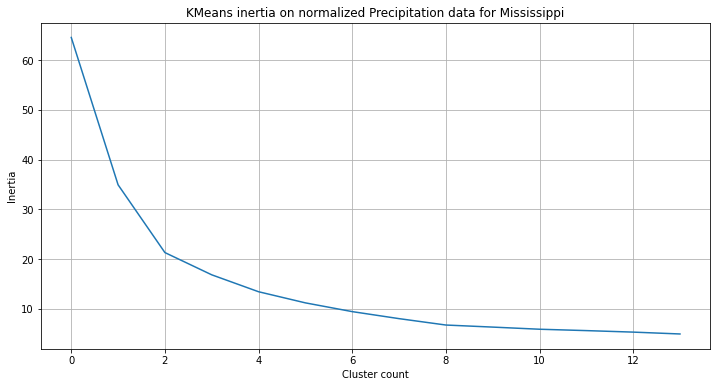

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "MS"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Mississippi")
plt.grid(True)

No handles with labels found to put in legend.


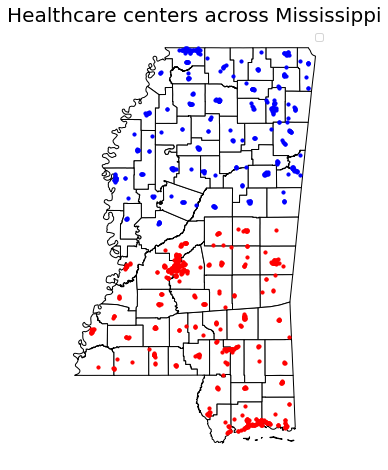

In [ ]:
map_data = prec_data[prec_data["STATE"] == "MS"].copy()

kmeans = KMeans(2, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = mississippi.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ms = map_data
points = [Point(xy) for xy in zip(centers_ms["LONGITUDE"], centers_ms["LATITUDE"])]
centers_ms = gpd.GeoDataFrame(centers_ms, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ms[centers_ms["Cluster"] == 0].plot(color = 'red', ax = ax, markersize = 10)
centers_ms[centers_ms["Cluster"] == 1].plot(color = 'blue', ax = ax, markersize = 10)


plt.title("Healthcare centers across Mississippi", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_ms[centers_ms["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_ms[centers_ms["Cluster"] == 1].mean(axis=0))[4:].mean())

182.81363369611606
172.89325068870522


In [ ]:
cl_0 = list(centers_ms.index[centers_ms['Cluster']==0])
cl_1 = list(centers_ms.index[centers_ms['Cluster']==1])

centers_ms.loc[cl_0, 'Color']='red'
centers_ms.loc[cl_1, 'Color']='blue'

centers_ms = centers_ms[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_ms.to_csv("Mississippi.csv", index=False)

**NORTH CAROLINA**

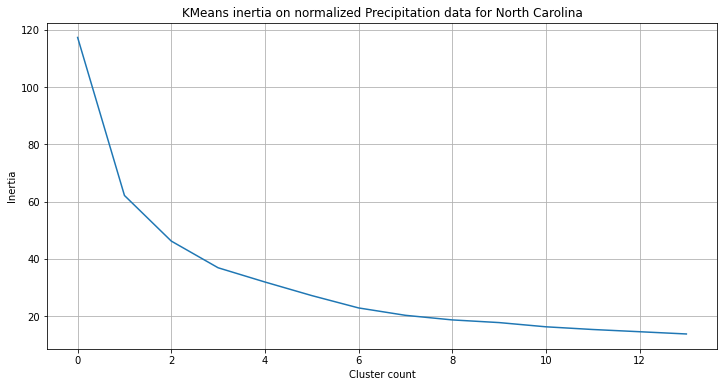

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "NC"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for North Carolina")
plt.grid(True)

No handles with labels found to put in legend.


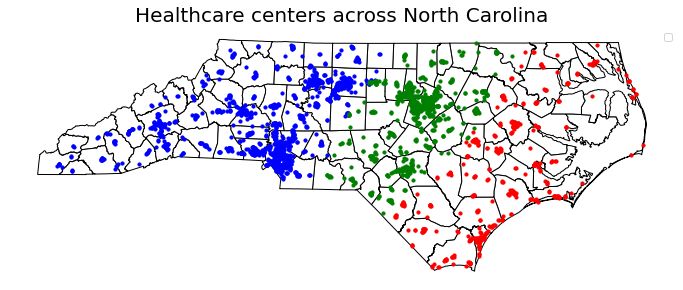

In [ ]:
map_data = prec_data[prec_data["STATE"] == "NC"].copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = northcarolina.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_nc = map_data
points = [Point(xy) for xy in zip(centers_nc["LONGITUDE"], centers_nc["LATITUDE"])]
centers_nc = gpd.GeoDataFrame(centers_nc, crs = {'init': 'epsg:4326'}, geometry = points)

centers_nc[centers_nc["Cluster"] == 0].plot(color = 'blue', ax = ax, markersize = 10)
centers_nc[centers_nc["Cluster"] == 1].plot(color = 'red', ax = ax, markersize = 10)
centers_nc[centers_nc["Cluster"] == 2].plot(color = 'green', ax = ax, markersize = 10)

plt.title("Healthcare centers across North Carolina", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_nc[centers_nc["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_nc[centers_nc["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_nc[centers_nc["Cluster"] == 2].mean(axis=0))[4:].mean())

154.49879423113128
168.7467399403875
151.16029931213984


In [ ]:
cl_0 = list(centers_nc.index[centers_nc['Cluster']==0])
cl_1 = list(centers_nc.index[centers_nc['Cluster']==1])
cl_2 = list(centers_nc.index[centers_nc['Cluster']==2])

centers_nc.loc[cl_0, 'Color']='blue'
centers_nc.loc[cl_1, 'Color']='red'
centers_nc.loc[cl_2, 'Color']='green'

centers_nc = centers_nc[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_nc.to_csv("North_Carolina.csv", index=False)

**TENNESSEE**

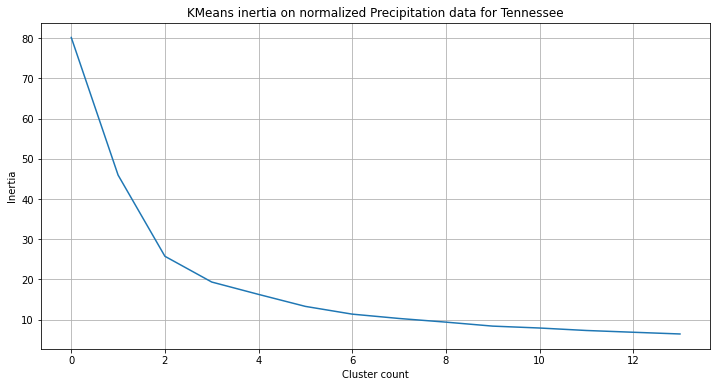

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "TN"].iloc[:, 7:]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Tennessee")
plt.grid(True)

No handles with labels found to put in legend.


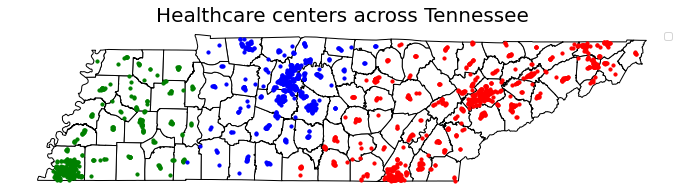

In [ ]:
map_data = prec_data[prec_data["STATE"] == "TN"].copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = tennessee.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_tn = map_data
points = [Point(xy) for xy in zip(centers_tn["LONGITUDE"], centers_tn["LATITUDE"])]
centers_tn = gpd.GeoDataFrame(centers_tn, crs = {'init': 'epsg:4326'}, geometry = points)

centers_tn[centers_tn["Cluster"] == 0].plot(color = 'green', ax = ax, markersize = 10)
centers_tn[centers_tn["Cluster"] == 1].plot(color = 'blue', ax = ax, markersize = 10)
centers_tn[centers_tn["Cluster"] == 2].plot(color = 'red', ax = ax, markersize = 10)

plt.title("Healthcare centers across Tennessee", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print((centers_tn[centers_tn["Cluster"] == 0].mean(axis=0))[4:].mean())
print((centers_tn[centers_tn["Cluster"] == 1].mean(axis=0))[4:].mean())
print((centers_tn[centers_tn["Cluster"] == 2].mean(axis=0))[4:].mean())

168.56959247648908
171.76995034807533
177.46051115178622


In [ ]:
cl_0 = list(centers_tn.index[centers_tn['Cluster']==0])
cl_1 = list(centers_tn.index[centers_tn['Cluster']==1])
cl_2 = list(centers_tn.index[centers_tn['Cluster']==2])

centers_tn.loc[cl_0, 'Color']='green'
centers_tn.loc[cl_1, 'Color']='blue'
centers_tn.loc[cl_2, 'Color']='red'

centers_tn = centers_tn[['ID','NAME','ADDRESS','STATE','LATITUDE','LONGITUDE','TYPE','Cluster','Color']]
centers_tn.to_csv("Tennessee.csv", index=False)